In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import os 

In [2]:
os.chdir("C:\\Users\\ACER\\Downloads\\PYTHAN\\Datasets-main\\Datasets-main")

In [3]:
df=pd.read_csv('hotel_bookings.csv')

In [4]:
df.shape

(119390, 32)

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,09-06-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,09-07-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,09-07-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,09-07-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,09-07-2017


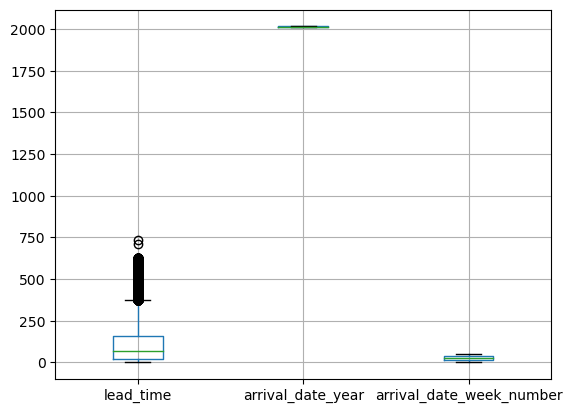

In [8]:
df.boxplot(column=["lead_time","arrival_date_year","arrival_date_week_number"])
plt.show()

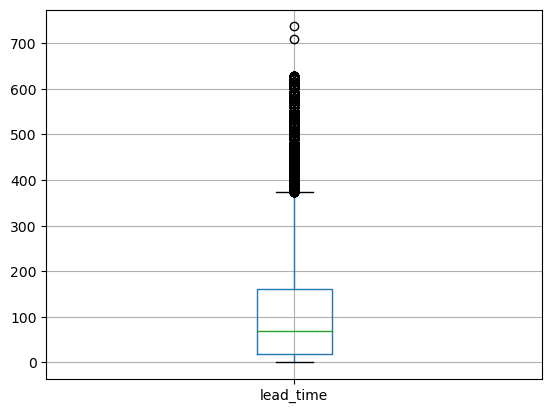

In [9]:
df.boxplot(column="lead_time")
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
df=df.drop(["company"],axis=1)

In [13]:
median1=df["children"].median()
median1

0.0

In [14]:
mean1=df["children"].mean()
mean1

0.10388990333874994

In [15]:
df["children"].replace(np.nan,mean1,inplace=True)

In [16]:
duplicated=df.duplicated()
print(duplicated.sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool>


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12189
days_in_waiting_list                  0


In [20]:
mode1=df["country"].mode().values[0]
mode1

'PRT'

In [21]:
df["country"].replace(np.nan,mode1,inplace=True)

In [22]:
mean2=df["agent"].mean()
mean2

94.13863031914893

In [23]:
df["agent"].replace(np.nan,mean2,inplace=True)

In [24]:
#mean3=df["company"].mean()
#mean3

In [25]:
#df["company"].replace(np.nan,mean3,inplace=True)

In [26]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [27]:
duplicate=df.duplicated()
print(duplicate.sum())

19


In [28]:
df.drop_duplicates(inplace=True)

In [29]:
df.duplicated().sum()

0

In [30]:
df.shape

(87370, 31)

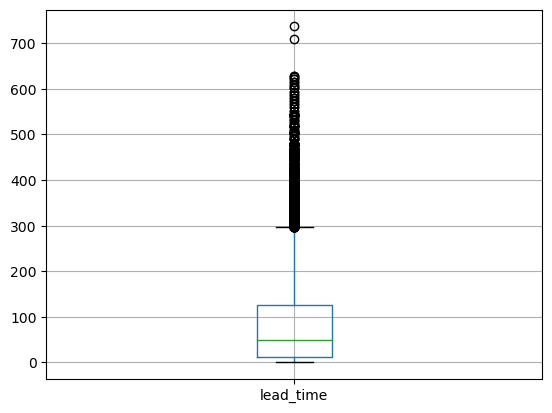

In [31]:
df.boxplot(column=["lead_time"])
plt.show()

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    high_range=Q3+(1.5*IQR)
    return lower_range,high_range

In [33]:
lowleadtime,highleadtime=remove_outlier(df["lead_time"])
df["lead_time"]=np.where(df["lead_time"]>highleadtime,highleadtime,df["lead_time"])
df["lead_time"]=np.where(df["lead_time"]<lowleadtime,lowleadtime,df["lead_time"])

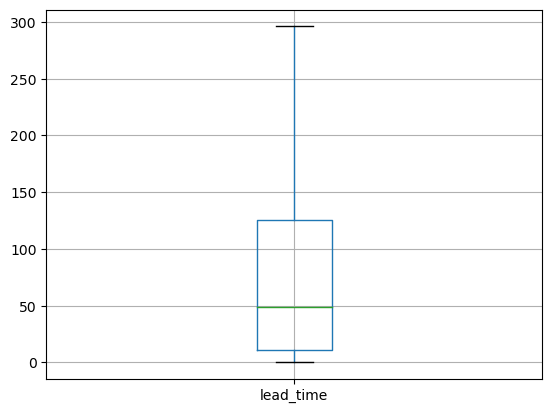

In [34]:
df.boxplot(column=["lead_time"])
plt.show()

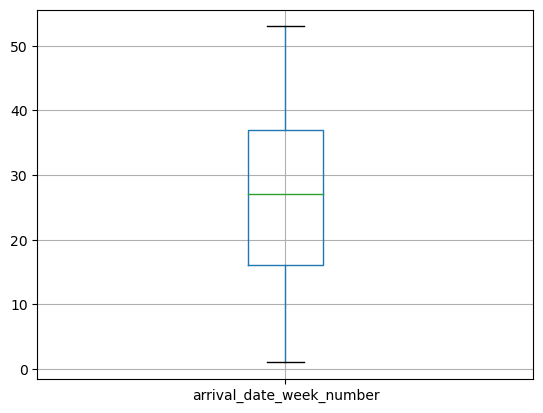

In [35]:
df.boxplot(column=["arrival_date_week_number"])
plt.show()

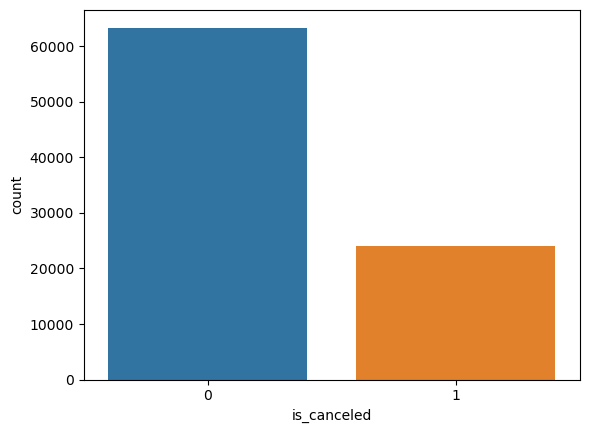

In [36]:
sns.countplot(x="is_canceled",data=df)
plt.show()

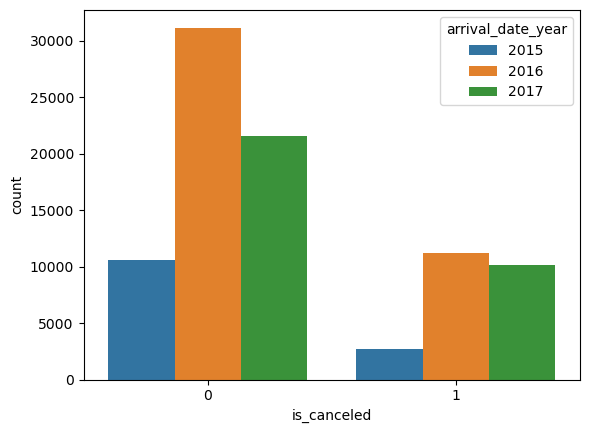

In [37]:
sns.countplot(x="is_canceled",hue="arrival_date_year",data=df)
plt.show()

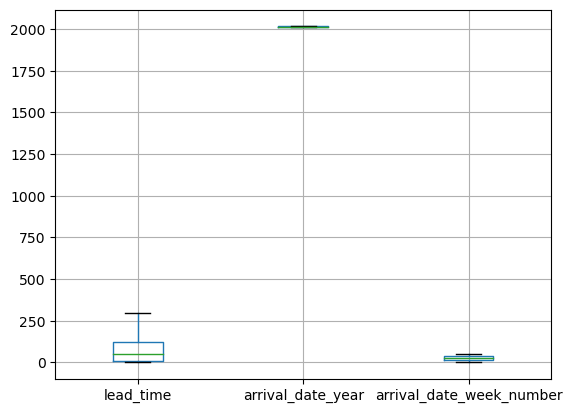

In [38]:
df.boxplot(column=["lead_time","arrival_date_year","arrival_date_week_number"])
plt.show()

In [39]:
df=pd.get_dummies(df,columns=["hotel","arrival_date_month","country","deposit_type","market_segment","distribution_channel","reserved_room_type","meal","assigned_room_type","booking_changes","customer_type","reservation_status","reservation_status_date"])

In [40]:
df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,0,296.0,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,296.0,2015,27,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7.0,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,13.0,2015,27,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,14.0,2015,27,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#df.dropna(inplace=True)

In [42]:
#df.drop("hotel",axis=1,inplace=True)

In [43]:
#df.drop(["meal","country","market_segment","distribution_channel"],axis=1,inplace=True)

In [44]:
#df.drop(["reserved_room_type","assigned_room_type","deposit_type","customer_type","reservation_status","arrival_date_month"],axis=1,inplace=True)

In [45]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [46]:
df.dtypes

is_canceled                             int64
lead_time                             float64
arrival_date_year                       int64
arrival_date_week_number                int64
arrival_date_day_of_month               int64
stays_in_weekend_nights                 int64
stays_in_week_nights                    int64
adults                                  int64
children                              float64
babies                                  int64
is_repeated_guest                       int64
previous_cancellations                  int64
previous_bookings_not_canceled          int64
agent                                 float64
days_in_waiting_list                    int64
adr                                   float64
required_car_parking_spaces             int64
total_of_special_requests               int64
hotel_City Hotel                        uint8
hotel_Resort Hotel                      uint8
arrival_date_month_April                uint8
arrival_date_month_August         

In [47]:
#df["reservation_status_date"]=df["reservation_status_date"].str.replace("-","")

In [48]:
#df["reservation_status_date"]=df["reservation_status_date"].str.replace("/","").astype(float)

In [49]:
df.isnull().sum()

is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
agent                                 0
days_in_waiting_list                  0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
hotel_City Hotel                      0
hotel_Resort Hotel                    0
arrival_date_month_April              0
arrival_date_month_August             0
arrival_date_month_December           0
arrival_date_month_February           0
arrival_date_month_January            0


In [50]:
df.shape

(87370, 1206)

In [51]:
X=df.drop(["is_canceled"],axis=1)
Y=df[["is_canceled"]]

In [52]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=1)

In [53]:
model_1=LogisticRegression()
model_1.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
model_1.score(X_train,Y_train)

0.9878349874916202

In [55]:
model_1.score(X_test,Y_test)

0.9885925756361833

In [56]:
predictions=model_1.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,predictions)

0.9885925756361833

In [58]:
from sklearn import metrics

<AxesSubplot:>

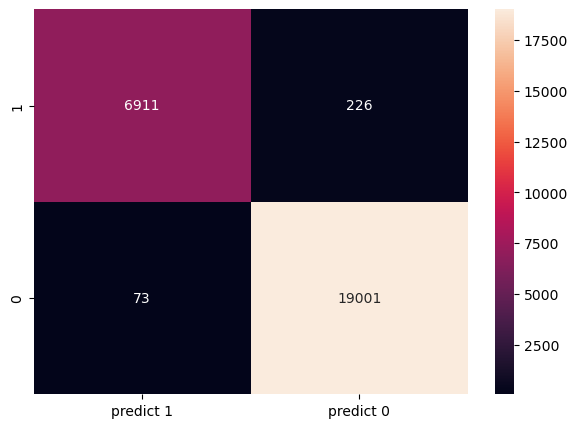

In [59]:
cm=metrics.confusion_matrix(Y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],
                  columns=[i for i in ["predict 1","predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt="g")

In [60]:
print(metrics.classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19074
           1       0.99      0.97      0.98      7137

    accuracy                           0.99     26211
   macro avg       0.99      0.98      0.99     26211
weighted avg       0.99      0.99      0.99     26211



In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model2_reg=DecisionTreeClassifier()
model2_reg.fit(X_train,Y_train)
print(model2_reg.score(X_train,Y_train))
print(model2_reg.score(X_test,Y_test))

1.0
1.0


In [63]:
model2_reg=DecisionTreeClassifier(max_depth=2,criterion="entropy")
model2_reg.fit(X_train,Y_train)
print(model2_reg.score(X_train,Y_train))
print(model2_reg.score(X_test,Y_test))

1.0
1.0
